 Метод Ньютона для нахождения решения нелинейного уравнения
f(x) = 3 ** x - 5 * x ** 2 + 1
1st derivative: 3**x*log(3) - 10*x
2nd derivative: 3**x*log(3)**2 - 10
кол-во итераций: 4
x =  0.8379412169791675
f(x) =  -8.881784197001252e-16


 Метод простых итераций для нелинейных уравнений
кол-во итераций: 10
x =  0.837936959832203
4.257146964503633e-06


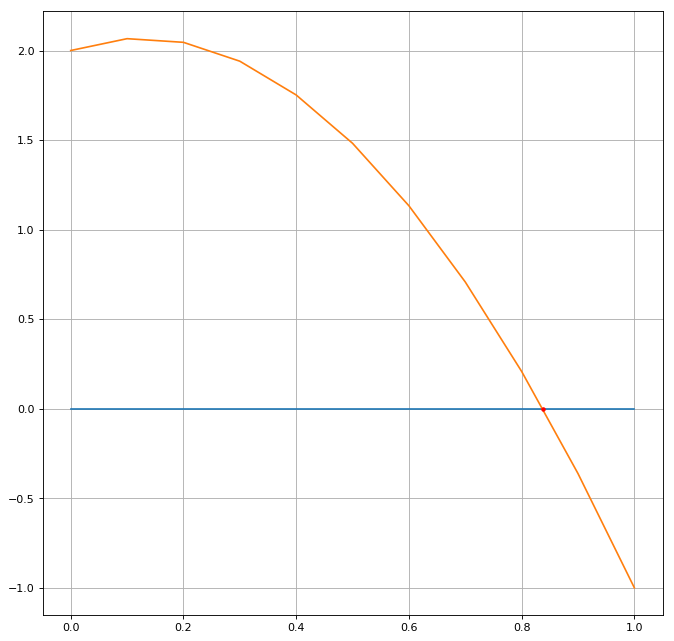

In [2]:
from sympy import *
import numpy as np
from matplotlib import pylab as plt

def myfunc(x: float)->float:
    return 3 ** x - 5 * x ** 2 + 1
print(' Метод Ньютона для нахождения решения нелинейного уравнения')
print ("f(x) = 3 ** x - 5 * x ** 2 + 1")
# Рассмотрим отрезок от [0, 1]
a = 0 
b = 1
x = np.arange(0, 1 + 0.1, 0.1)
#plt.plot(x, myfunc(x))

def calc_derivative(func: object, symbol='x')->object:
    ''' Вычисление первой и второй производной для функции одной переменной'''
    x = Symbol(symbol)
    func_f_der = func(x).diff(x)
    print("1st derivative: %s"%func_f_der)
    fdx = lambdify(x, func_f_der, "numpy") # первая производная
    func_s_der = func_f_der.diff(x)
    print("2nd derivative: %s"%func_s_der)
    fdxdx = lambdify(x, func_s_der, "numpy") # вторая производная
    return fdx, fdxdx

def newton(func: object,
           func_dx: object,
           func_dx_dx: object, 
           eps: float, 
           interval: list):
    ''' Метод Ньютона для нахождения решения нелинейного уравнения '''
    
    a = interval[0]
    b = interval[1]
    
    def calc_x_zer()->float:
        if func(a) * func_dx_dx(a) > 0:
            return a
        elif func(b) * func_dx_dx(b) > 0:
            return b
    
    def good_enough(x_cur, x_prev):
        return np.abs(x_cur - x_prev) <= eps
   
    x_zer = calc_x_zer()
#     print(x_zerr)
    
    iteration = 0
    x_prev = x_zer
    
    flag = 1
    while flag:
        h = - func(x_prev) / func_dx(x_prev)
        x_cur = x_prev + h
        iteration += 1
        if good_enough(x_cur, x_prev):
            flag = 0
        x_prev = x_cur
   
    print('кол-во итераций:',iteration)
    print( 'x = ',x_cur)
    print('f(x) = ' , 3 ** x_cur - 5 * x_cur ** 2 + 1)
    return iteration, x_cur

func_dx, func_dx_dx = calc_derivative(myfunc)

result = []
eps = 1e-5 
result = newton(myfunc, func_dx, func_dx_dx, eps, [a, b])


fig = plt.figure(figsize=(10,10), dpi=80)
x = np.arange(0, 1 + 0.1, 0.1)
y = np.zeros(len(x))
plt.plot(x, y)
plt.plot(x, myfunc(x))
plt.plot([result[1]], [0], marker='o', markersize=3, color="red")
plt.grid(True)
#plt.show()

print('\n\n Метод простых итераций для нелинейных уравнений')


def fixed_point_iteration(func: object, 
                          eps:float, 
                          interval: list)->list:
    ''' Метод простых итераций для нелинейных уравнений'''
    a = interval[0]
    b = interval[1]
    
    def calc_x_zerr()->float:
        return (b + a) / 2
    
    def good_enough(x_cur: float, x_prev: float)->bool:
        return np.abs(x_cur - x_prev) <= eps
    
    x_zer = calc_x_zerr()
    iteration = 0
    flag = 1
    
    x_prev = x_zer
    
    while flag:
        x_cur = phi_func(x_prev)
        iteration += 1       
        if good_enough(x_cur, x_prev):
            flag = 0
        x_prev = x_cur
    
    print('кол-во итераций:',iteration)
    print( 'x = ',x_cur)
    return iteration, x_cur


def phi_func(x: float)->float:
    return np.sqrt((3 ** x + 1)/5)


results_1 = []
results_1 = fixed_point_iteration(phi_func, eps, [a, b])

print(np.abs(result[1] - results_1[1]))

plt.show()
